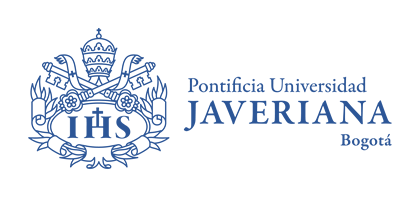

# Aprendizaje de Máquina - Redes neuronales artificiales
## Perceptrón y ADALINE
Este notebook tiene como objetivo familiarizar al estudiante con los modelos de redes neuronales básicos: Perceptrón y ADALINE. Se prueba el desempeño con 2 conjuntos de  datos: linealmente separables y no linealmente separables.


## Autor: Carlos A. Talero J y Ruben Romero 
### Fecha: 014 de Marzo de 2024
##### Programa: Maestría de Inteligencia Artificial
##### Universidad: Pontificia Universidad Javeriana
##### Ciudad: Bogotá, D.C., Colombia
##### Profesor: Ing. Andres Dario Moreno Barbosa
##### Materia: Aprendizaje de Máquina

## Setup
Se instalan y se importan las librerías necesarias para el ejercicio

In [161]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [162]:
sklearn.__version__

'1.3.0'

## Conjunto de datos - Generación de datos sintéticos

Inicialmente crearemos 2 conjuntos de datos sintéticos, uno linealmente separable y el otro no




In [163]:
N=300

In [164]:
# Creación del dataset aleatorio
X_ejemplo1 , y_true = make_blobs(n_samples=N, centers=2, cluster_std=0.4, random_state=0)
y_true

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [165]:
# Intercambio X[0] y X[1]
X_ejemplo1 = X_ejemplo1[:, ::-1]
X_ejemplo1

array([[ 4.68157912,  1.92952799],
       [ 0.85162067,  2.40560063],
       [ 4.88549673,  1.03388751],
       [ 0.89978072,  2.38390181],
       [ 4.82452582,  1.25219734],
       [ 3.19475022,  1.13588862],
       [ 0.71337574,  2.32182075],
       [ 4.33880782,  1.3560384 ],
       [ 0.87742224,  2.1349876 ],
       [ 0.83383428,  2.33277678],
       [ 0.50613172,  1.8482599 ],
       [ 4.10645937,  0.40664571],
       [ 0.23497762,  2.07071974],
       [ 4.35245733,  1.28068517],
       [ 4.58168698,  1.25288558],
       [ 1.24328458,  1.10743276],
       [ 3.809857  ,  1.43203035],
       [ 4.67267   ,  1.22190183],
       [ 0.99825743,  1.13981951],
       [ 3.75044175,  0.68603113],
       [ 1.70608108,  2.19082917],
       [ 4.22172402,  1.57390171],
       [ 4.28276041,  0.73774446],
       [ 4.21869122,  0.33071094],
       [ 0.11021378,  1.52238286],
       [ 0.50041422,  2.1674442 ],
       [ 4.18286623,  0.82133935],
       [ 1.24973522,  1.97250605],
       [ 0.78552146,

In [166]:
shuffler = np.random.permutation(len(y_true))
X_ejemplo1 = X_ejemplo1[shuffler]
y_true = y_true[shuffler]

In [167]:
X_ejemplo1

array([[ 4.91833815,  0.69945014],
       [ 4.43056437,  1.451482  ],
       [ 3.83654993,  0.96055695],
       [ 4.83434169,  1.09556535],
       [ 0.54207512,  1.38278024],
       [ 1.24973522,  1.97250605],
       [ 4.46677206,  1.24518798],
       [ 4.07347214,  1.18469603],
       [ 4.23181739,  1.44778191],
       [ 5.07560015,  0.7770571 ],
       [ 4.45982466,  1.758635  ],
       [ 0.94715243,  1.21742629],
       [ 4.15869086,  0.72254124],
       [ 3.73578015,  0.55684889],
       [ 1.14580698,  1.8634052 ],
       [ 4.02986329,  1.13720674],
       [ 0.69197007,  1.79184633],
       [ 4.11137648,  0.72503505],
       [ 4.03839601,  0.93688907],
       [ 4.61626657,  0.51379711],
       [ 4.10106079,  0.50072638],
       [ 4.36632692,  0.83710522],
       [ 0.61377247,  1.94499931],
       [ 0.54129763,  2.16507406],
       [ 4.24324444,  1.35630545],
       [ 4.25734575,  1.17376679],
       [ 4.0048054 ,  0.81082249],
       [ 0.57246646,  1.76742577],
       [ 4.62476989,

In [168]:
y_true

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

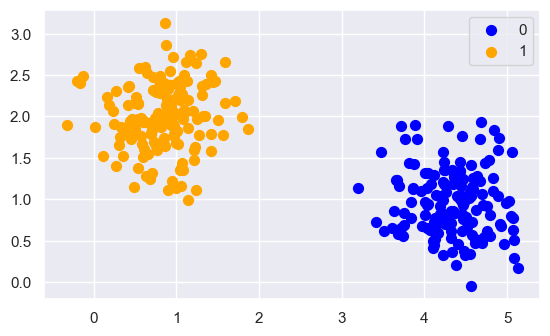

In [169]:
# Visualizamos los puntos
ax =  plt.gca()
ax.set_aspect('equal', adjustable='box')
for g, col in zip(np.unique(y_true),['blue','orange']):
    ix = np.where(y_true == g)
    ax.scatter(X_ejemplo1[ix,0], X_ejemplo1[ix,1], c = col, label = g, s = 50 )
#ax.scatter(X[:, 0], X[:, 1], s=50,  c=y_true, label=y_true,  cmap='viridis');
ax.legend()


## Generamos segundo dataset

In [170]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_ejemplo2, y_true2 = twospirals(N)

In [171]:
shuffler = np.random.permutation(len(y_true2))
X_ejemplo2 = X_ejemplo2[shuffler]
y_true2 = y_true2[shuffler]

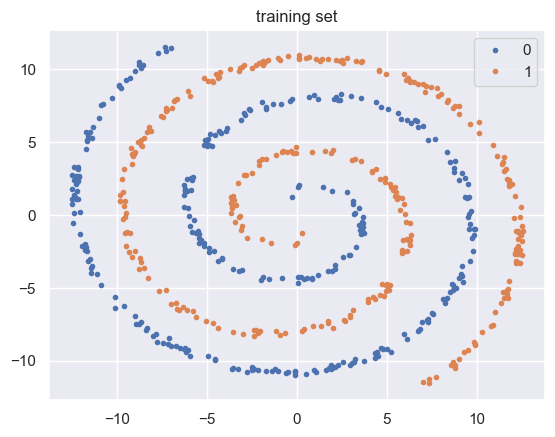

In [172]:
plt.title('training set')
plt.plot(X_ejemplo2[y_true2==0,0], X_ejemplo2[y_true2==0,1], '.', label=0)
plt.plot(X_ejemplo2[y_true2==1,0], X_ejemplo2[y_true2==1,1], '.', label=1)
plt.legend()
plt.show()

# Tareas:
* Dividir datasets train - test
* Crear perceptrón simple y probar su desempeño
* Crear ADALINE y probar su desempeño
* Probar ambos modelos con una regresión logística y probar su desempeño

In [173]:
# separable
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_ejemplo1, y_true, test_size=0.20, random_state=42)
# no separable
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_ejemplo2, y_true2, test_size=0.20, random_state=42)

In [174]:
X1_train.shape

(240, 2)

In [175]:
X1_test.shape

(60, 2)

##  1. Crear  perceptrón simple y probar su desempeño

El primer modelo a probar es un perceptron simple, complete las instrucciones que dicen TODO:

In [176]:
class Perceptron(object):

    def __init__(self, samples, labels, init_val = None):
        """
        Inicialización del perceptrón
        Parametros:
        samples -- Conjunto de entrenamiento
        labels -- Etiquetas
        init_val -- Pesos hipótesis inicial

        """
        ulabels = np.unique(labels)

        # se añade un 1 a los ejemplos (folding in)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1)
        self.labels = labels
        # Inicialización aleatoria (en clase lo hicimos con 0's)
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 20):
        """
        Inicialización del perceptrón
        Parametros:
        learning_rate -- Paso del ajuste de hipótesis del perceptrón
        iterations -- Epocas

        """
        for i in range(iterations):
            errs = 0
            for sample, label, sample_id in zip(self.samples, self.labels, range(0,len(self.labels))):
                f = np.sign(np.dot(sample, self.weights))>0
                if f != label:
                    self.weights += learning_rate * (label - (1 if f else -1)) * sample
                    # self.weights += learning_rate * (label - (0 if f else 1)) * sample
                    errs += 1
                    print(f'Error in iteration {i+1} sample id {sample_id}')
                    pass
            if errs == 0:
                print("Found a boundary in %d iterations." % (i + 1))
                return self
            pass
        print("Failed to find a boundary.")
        pass

    def predict(self, new_samples):
        """
        Función de predicción del perceptrón
        Parametros:
        new_samples -- X

        Returns:
        Labels para los new_samples
        """
        #Inserta 1 a los samples
        X = np.insert(new_samples,0,np.ones(new_samples.shape[0]),axis=1)

        predicts= np.sign(np.dot(X, self.weights))
        predicts = np.where(predicts >= 0, 1, 0)
        return predicts

In [177]:
# Ajusta tus etiquetas de Y1_train de 0 a -1 y de 1 a 1
Y1_train_transformed = np.where(Y1_train == 0, -1, 1)

In [178]:
p1= Perceptron(X1_train,Y1_train_transformed)

In [179]:
p1.train()

Error in iteration 1 sample id 0
Error in iteration 1 sample id 2
Error in iteration 1 sample id 5
Error in iteration 1 sample id 7
Error in iteration 1 sample id 10
Error in iteration 1 sample id 14
Error in iteration 1 sample id 15
Error in iteration 1 sample id 22
Error in iteration 1 sample id 24
Error in iteration 1 sample id 25
Error in iteration 1 sample id 26
Error in iteration 1 sample id 27
Error in iteration 1 sample id 28
Error in iteration 1 sample id 29
Error in iteration 1 sample id 31
Error in iteration 1 sample id 32
Error in iteration 1 sample id 36
Error in iteration 1 sample id 39
Error in iteration 1 sample id 40
Error in iteration 1 sample id 43
Error in iteration 1 sample id 44
Error in iteration 1 sample id 45
Error in iteration 1 sample id 47
Error in iteration 1 sample id 48
Error in iteration 1 sample id 50
Error in iteration 1 sample id 55
Error in iteration 1 sample id 56
Error in iteration 1 sample id 57
Error in iteration 1 sample id 58
Error in iteration

In [180]:
y_pred = p1.predict(X1_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [181]:
Y1_test

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

Compare utilizando las métricas precision y recall
https://scikit-learn.org/stable/modules/model_evaluation.html

In [182]:
from sklearn.metrics import precision_score, recall_score

# Calcular precision y recall
precision = precision_score(Y1_test, y_pred)
recall = recall_score(Y1_test, y_pred)

# Imprimir los resultados
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.9375
Recall: 1.0


In [183]:
# Ajusta tus etiquetas de Y1_train de 0 a -1 y de 1 a 1
Y2_train_transformed = np.where(Y2_train == 0, -1, 1)

In [184]:
p2= Perceptron(X2_train,Y2_train_transformed)

In [185]:
p2.train()

Error in iteration 1 sample id 0
Error in iteration 1 sample id 3
Error in iteration 1 sample id 4
Error in iteration 1 sample id 5
Error in iteration 1 sample id 6
Error in iteration 1 sample id 7
Error in iteration 1 sample id 8
Error in iteration 1 sample id 9
Error in iteration 1 sample id 11
Error in iteration 1 sample id 12
Error in iteration 1 sample id 14
Error in iteration 1 sample id 15
Error in iteration 1 sample id 16
Error in iteration 1 sample id 17
Error in iteration 1 sample id 18
Error in iteration 1 sample id 19
Error in iteration 1 sample id 20
Error in iteration 1 sample id 21
Error in iteration 1 sample id 23
Error in iteration 1 sample id 25
Error in iteration 1 sample id 26
Error in iteration 1 sample id 27
Error in iteration 1 sample id 28
Error in iteration 1 sample id 31
Error in iteration 1 sample id 32
Error in iteration 1 sample id 33
Error in iteration 1 sample id 35
Error in iteration 1 sample id 37
Error in iteration 1 sample id 38
Error in iteration 1 s

In [186]:
y_pred2 = p2.predict(X2_test)
y_pred2

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [187]:
Y2_test

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0.])

In [188]:
from sklearn.metrics import precision_score, recall_score

# Calcular precision y recall
precision = precision_score(Y2_test, y_pred2)
recall = recall_score(Y2_test, y_pred2)

# Imprimir los resultados
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.5238095238095238
Recall: 0.6111111111111112


# 2. Crear modelo ADALINE

El segundo modelo a crear es el modelo ADALINE, complete el siguiente esquema completando las instrucciones TODO:

In [189]:
class ADALINE(object):

    def __init__(self, samples, labels, init_val = None):
        """
        Inicialización de modelo ADALINE
        Parametros:
        samples -- Conjunto de entrenamiento
        labels -- Etiquetas
        init_val -- Pesos hipótesis inicial

        """
        ulabels = np.unique(labels)

        # se añade un 1 a los ejemplos (folding in)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1)
        self.labels = labels
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 20):
        """
        Inicialización del perceptrón
        Parametros:
        learning_rate -- Paso del ajuste de hipótesis del perceptrón
        iterations -- Epocas

        """
        for i in range(iterations):
            global_error = 0
            for sample, label, sample_id in zip(self.samples, self.labels, range(len(self.labels))):
                output = np.dot(sample, self.weights)
                error = label - output
                self.weights += learning_rate * error * sample
                global_error += error ** 2
            if global_error == 0:
                print(f"Found a boundary in {i + 1} iterations.")
                return self
        print("Failed to find a boundary.")

    def predict(self, new_samples):
        """
        Función de predicción del perceptrón
        Parametros:
        new_samples -- X

        Returns:
            Labels para los new_samples
        """
        X = np.insert(new_samples, 0, np.ones(new_samples.shape[0]), axis=1)
        predicts = np.dot(X, self.weights)  # Salida lineal
        predicts = np.where(predicts >= 0, 1, 0)  # Umbral para clasificación
        return predicts

In [190]:
a1= ADALINE(X1_train,Y1_train)

In [191]:
a1.train()

Failed to find a boundary.


In [192]:
y_pred1 = a1.predict(X1_test)

In [193]:
Y1_test

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

Compare utilizando las métricas precision y recall
https://scikit-learn.org/stable/modules/model_evaluation.html

In [194]:
from sklearn.metrics import precision_score, recall_score

# Calcular precision y recall
precision = precision_score(Y1_test, y_pred1)
recall = recall_score(Y1_test, y_pred1)

# Imprimir los resultados
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.5357142857142857
Recall: 1.0


In [195]:
a2= ADALINE(X2_train,Y2_train)

In [196]:
a2.train()

Failed to find a boundary.


In [197]:
y_pred2 = a2.predict(X2_test)

In [198]:
Y2_test

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0.])

In [199]:
from sklearn.metrics import precision_score, recall_score

# Calcular precision y recall
precision = precision_score(Y2_test, y_pred2)
recall = recall_score(Y2_test, y_pred2)

# Imprimir los resultados
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.4811320754716981
Recall: 0.9444444444444444


##  3. Crear modelo de regresión logística y probar desempeño

Inicialice un modelo de regresión logística usando scikit-learn y compare contra el modelo de perceptrón y ADALINE con ambos datasets.

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Para el primer conjunto de datos
l1 = LogisticRegression()
l1.fit(X1_train, Y1_train)

# Para el segundo conjunto de datos
l2 = LogisticRegression()
l2.fit(X2_train, Y2_train)

# Perceptrón - Imprimir informe de clasificación en Datos de Validación
print("Perceptrón - Ejemplo 1: Informe de Clasificación en Datos de Validación:")
print(classification_report(p1.predict(X1_test), Y1_test))
# Perceptrón - Imprimir informe de clasificación en Datos de Validación
print("Perceptrón - Ejemplo 2: Informe de Clasificación en Datos de Validación:")
print(classification_report(p2.predict(X2_test), Y2_test))

# ADALINE - Imprimir informe de clasificación en Datos de Validación
print("ADALINE - Ejemplo 1: Informe de Clasificación en Datos de Validación:")
print(classification_report(a1.predict(X1_test), Y1_test))
# ADALINE - Imprimir informe de clasificación en Datos de Validación
print("ADALINE - Ejemplo 2: Informe de Clasificación en Datos de Validación:")
print(classification_report(a2.predict(X2_test), Y2_test))

# Logística - Imprimir informe de clasificación en Datos de Validación
print("Logística - Ejemplo 1: Informe de Clasificación en Datos de Validación:")
print(classification_report(l1.predict(X1_test), Y1_test))
# Logística - Imprimir informe de clasificación en Datos de Validación
print("Logística - Ejemplo 2: Informe de Clasificación en Datos de Validación:")
print(classification_report(l2.predict(X2_test), Y2_test))

Perceptrón - Ejemplo 1: Informe de Clasificación en Datos de Validación:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.94      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

Perceptrón - Ejemplo 2: Informe de Clasificación en Datos de Validación:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        57
           1       0.61      0.52      0.56        63

    accuracy                           0.57       120
   macro avg       0.58      0.58      0.57       120
weighted avg       0.58      0.57      0.57       120

ADALINE - Ejemplo 1: Informe de Clasificación en Datos de Validación:
              precision    recall  f1-score   support

           0       0.13      1.00      0.24         4
           1       1.

# Conclusiones



### Perceptrón:
- **Ejemplo 1**: El modelo Perceptrón tuvo un rendimiento excelente en este conjunto de datos, con una precisión y recall altos para ambas clases (0 y 1). Esto indica que el modelo fue capaz de clasificar correctamente la gran mayoría de las muestras tanto positivas como negativas.
  
- **Ejemplo 2**: En este conjunto de datos, el rendimiento del Perceptrón disminuyó significativamente, con una precisión y recall más bajos. Esto sugiere que el conjunto de datos es más desafiante para el modelo, posiblemente debido a que no es linealmente separable o contiene más ruido.

### ADALINE:
- **Ejemplo 1**: ADALINE tuvo problemas significativos en este conjunto, mostrando una alta tasa de clasificación para una clase (recall de 1.00 para la clase 0) pero muy baja para la otra (recall de 0.54 para la clase 1). Esto puede indicar un problema de desbalance de clases o que el modelo no pudo ajustarse bien a los datos.
  
- **Ejemplo 2**: Similar al ejemplo 1, ADALINE tuvo un rendimiento pobre, con una precisión y recall desequilibrados entre las clases. Esto sugiere que, como en el primer ejemplo, el modelo podría estar teniendo problemas con características no lineales o desbalances significativos en las clases.

### Regresión Logística:
- **Ejemplo 1**: La Regresión Logística tuvo un rendimiento perfecto en este conjunto de datos, con una precisión y recall de 1.00 para ambas clases. Esto indica que el conjunto de datos es probablemente linealmente separable y que la Regresión Logística fue capaz de encontrar la frontera de decisión adecuada entre las clases.
  
- **Ejemplo 2**: En este conjunto, la Regresión Logística tuvo un rendimiento mejor que ADALINE pero similar al Perceptrón, indicando que, aunque el conjunto de datos presenta más desafíos que el primer conjunto, la Regresión Logística pudo manejar mejor la complejidad adicional en comparación con ADALINE.

### Conclusiones Generales:
- Los diferentes modelos tienen distintos grados de éxito dependiendo de las características del conjunto de datos. Mientras que el Perceptrón y la Regresión Logística funcionaron extremadamente bien en el primer conjunto de datos, ADALINE luchó considerablemente en ambos.
  
- El segundo conjunto de datos presenta un desafío mayor para todos los modelos, posiblemente debido a una menor separabilidad lineal o a un mayor desequilibrio de clases.

- La Regresión Logística demostró ser el modelo más robusto en general, manteniendo un rendimiento relativamente alto en ambos conjuntos de datos.

Estas diferencias subrayan la importancia de probar múltiples modelos en tareas de clasificación y de considerar las características específicas de cada conjunto de datos al elegir el mejor modelo para usar. Además, resaltan la relevancia de métricas más allá de la simple exactitud, como la precisión y el recall, para entender completamente el desempeño de los modelos en contextos de clasificación.